<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/01stOct_TimeSeries_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>

# **Introduction**

## **Alright everyone, what's up!👋Dev here, and guess what? We've got a super cool time series workshop lined up for today!🏗️ We'll be digging into some awesome data and uncovering some mind-blowing insights. 💹 I'm pumped for this, and I hope you are too! Just give everyone a few minutes to join in, and we'll kick things off at 07:10 AM sharp. See you there!😃**

<hr>

# **Agenda**

  **Build a model to forecast the demand (Passengers Traffic) in Airplanes. The data is classified in date/time and the passengers travelling per month**

<hr>

# **Components to Time-Series**

**Time Series: This method is used to analyze data points collected over time, by understanding the patterns and trends in time series data, analysts can make informed predictions and decisions.**

* **Components of Time Series**
  * **`Trend`: A trend in a time series is a long-term upward or downward movement in the data. It's a fundamental component that often influences the overall pattern of the series.**
  * **`Seasonality`: Seasonality is a recurring pattern in a time series that repeats over a fixed period. This periodicity can be daily, weekly, monthly, quarterly, or yearly.**
  * **Noise / Residual / Error**

* **Link to dataset: https://drive.google.com/file/d/1U2eHZDxJOXZr8MLW1vLaCluOhtC4T9iE/view?usp=sharing**

# **Step 1 - Importing the libraries**

#### **Configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### **Classical Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")

#### **Machine Learning Libraries**

In [ ]:
!pip install pmdarima
import itertools
from sklearn.metrics import *
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# We are going to use automated tools for the order of AR and MA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.6 MB/s eta 0:00:00


<hr>

# **Step 2 - Data Loading and Inspection**

#### **Data Loading**

In [ ]:
df = pd.read_csv("AirPassengers.csv")

#### **Data Inspection**

In [ ]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


* **This kind of data that we have with respect to time, it's called as sequential data**

## **Shape Inspection**

In [ ]:
a = df.shape  # The return type: tuple
print(f"Rows: {a[0]} and Columns: {a[1]}")

Rows: 144 and Columns: 2


## **Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**Here, we need to convert this month column into a date-time dtype**

In [ ]:
df["Month"] = pd.to_datetime(df["Month"], infer_datetime_format = True)

In [ ]:
df.head() # yyyy/mm/dd - every record that is there has been recorded at 01st of the month

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


#### **Set the index as Month**
  * **To make this data univariate**
  * **It's easier to visualize the data if we have the date column as index**

In [ ]:
df = df.set_index("Month")

#### **Visualize**

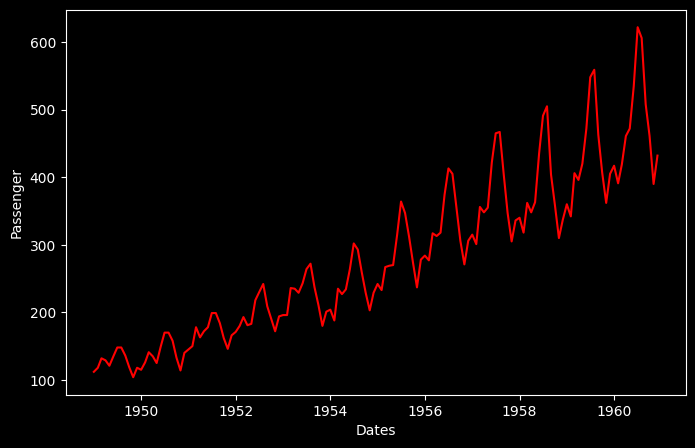

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(df, color = "red")
plt.xlabel("Dates")
plt.ylabel("Passenger")
plt.show()

* **The data shows the upward trend, moreover we can also say that this is seasonal upward trend**
* **There is a huge chance that the data in non-stationary, simply visualizing it, since the mean and the variance are increasing with respect to time**

# **Step 3 - Check for stationarity**

* **Mean and the variance of the data should be constant throughout the time period**

#### **Rolling Statistics**

In [ ]:
# Rolling mean for the 1 year timeframe
rolling_mean = df.rolling(window = 12).mean()

# Rolling std for the 1 year timeframe
rolling_std = df.rolling(window = 12).std()

#### **Visualize**

[]

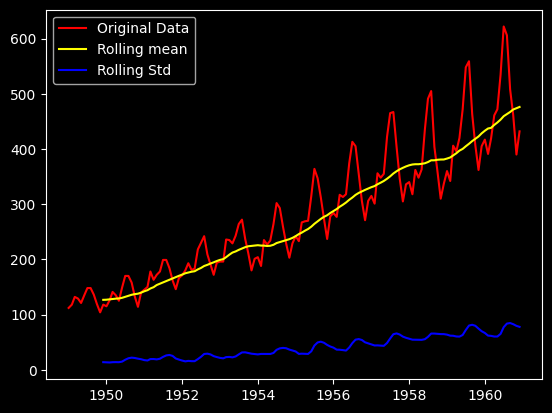

In [ ]:
original_data = plt.plot(df, color = "red", label = "Original Data")
mean_data = plt.plot(rolling_mean, color = "yellow", label = "Rolling mean")
std_data = plt.plot(rolling_std, color = "blue", label = "Rolling Std")
plt.legend()
plt.plot()

* **The mean is increasing with respect to time, whereas the variance is constant but not stable**

#### **ADFuller - Augmented Dickey Fuller Test**

* **The ADF test is a tool to check if your data is stationary or not.**

* **To confirm stationarity of a given data, you perform the ADF test. The test gives you a p-value.**

    * **If the p-value is low (e.g., less than 0.05), it means there's strong evidence that the data is stationary. This means the data is not consistently going up or down; it has a stable pattern.**
    * **If the p-value is high (e.g., greater than 0.05), it means there's not enough evidence to say the data is stationary. This suggests the data is indeed non-stationary, and its pattern is changing over time.**

In [ ]:
results = adfuller(df)

In [ ]:
print(f"P-value: {results[1]}")

P-value: 0.991880243437641


In [ ]:
if results[1] > 0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is not stationary


#### **Helper Function**

In [ ]:
def helper_check(data):
  # Rolling mean for the 1 year timeframe
  rolling_mean = data.rolling(window = 12).mean()

  # Rolling std for the 1 year timeframe
  rolling_std = data.rolling(window = 12).std()

  original_data = plt.plot(data, color = "red", label = "Original Data")
  mean_data = plt.plot(rolling_mean, color = "yellow", label = "Rolling mean")
  std_data = plt.plot(rolling_std, color = "blue", label = "Rolling Std")
  plt.legend()
  plt.plot()

  results = adfuller(data)
  print(f"P-value: {results[1]}")

  if results[1] > 0.05:
    return"The data is not stationary"
  else:
    return "The data is stationary"

<hr>

# **Step 4 - Achieving the stationarity**
  * **Transformation: Using this we can scale the values, and this will actually help us in making the variance constant**
  * **Differencing / Shift**

#### **Transformation**

* **Normalize data: Make data values more comparable, especially when dealing with skewed distributions.**
* **Stabilize variance: Ensure that the variance of the data remains constant over time.**
* **Linearize relationships: Make relationships between variables more linear, which is often assumed in statistical models.**
* **Handle non-stationarity: Convert non-stationary time series into stationary ones, which are easier to model.**

<hr>

#### **Log Transformation**

In [ ]:
df_log = np.log(df)

**Check for the stationarity**

P-value: 0.4223667747703874


'The data is not stationary'

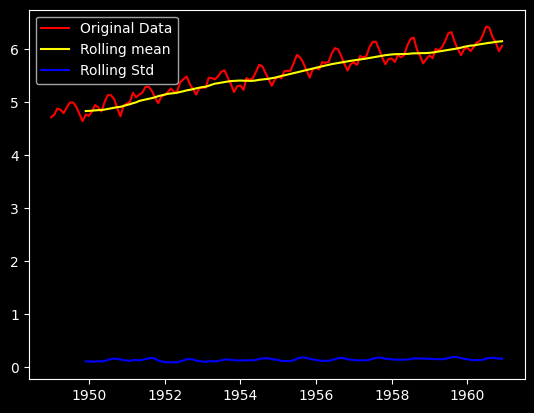

In [ ]:
helper_check(df_log)

In [ ]:
df_log2 = np.log(df_log)

P-value: 0.22258989117061084


'The data is not stationary'

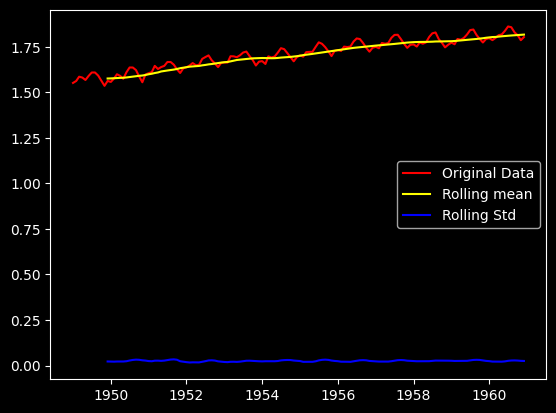

In [ ]:
helper_check(df_log2)

#### **Differencing**
  * **It's just taking the difference from the previous timestamp**

##### **First Order Differencing**

In [ ]:
df_log_diff1 = df_log.diff().dropna()

P-value: 0.07112054815086184


'The data is not stationary'

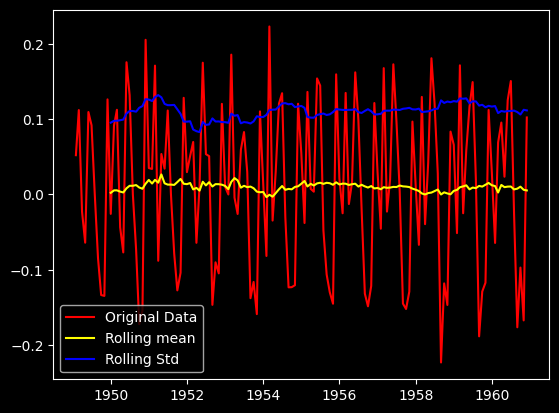

In [ ]:
helper_check(df_log_diff1)

##### **Second Order Differencing**

In [ ]:
df_log_diff2 = df_log.diff().diff().dropna()

In [ ]:
df_log_diff2

,#Passengers
Month,
1949-03-01,0.059932
1949-04-01,-0.135107
1949-05-01,-0.041032
1949-06-01,0.173506
1949-07-01,-0.017547
...,...
1960-08-01,-0.176733
1960-09-01,-0.150338
1960-10-01,0.079315


P-value: 7.419304549376186e-13


'The data is stationary'

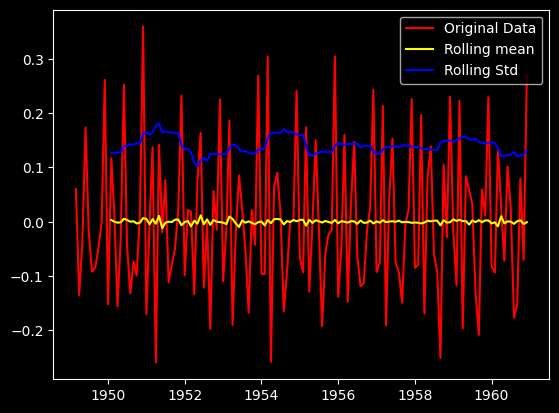

In [ ]:
helper_check(df_log_diff2)

<hr>

# **Step 5 - Discovering the order of Time Series**


### **Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)**
**These are the essential tools for analyzing the correlation structure of a time series. They help identify the appropriate order for ARMA models.**

#### **Autocorrelation Function (ACF)**
  * **Measures the correlation between a time series observation and its lagged observations.**
  * **AR models typically exhibit a significant ACF at lag 1 and possibly a few subsequent lags, but the ACF quickly decays to zero.**

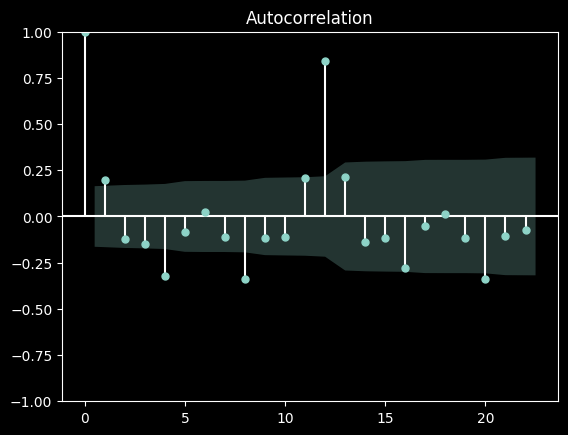

In [ ]:
plot_acf(df_log_diff1)
plt.show()
plt.close()

**Assuming/ Assumption: Order of ARIMA: (4, 0, 4)**

# **Step 6 - Model Building**

#### **ARIMA: Order(4, 0, 4)**

In [ ]:
model = ARIMA(df_log_diff1, order = (4, 0, 4))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


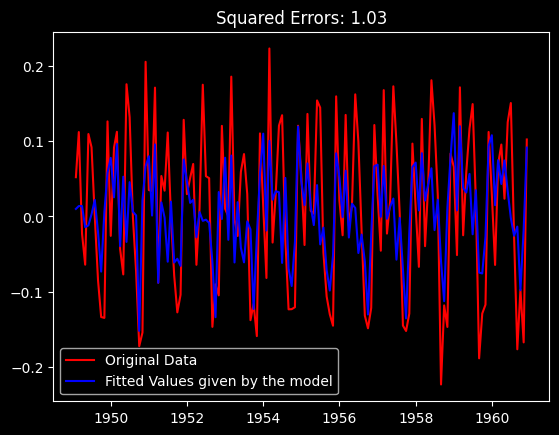

In [ ]:
plt.plot(df_log_diff1, label = "Original Data", color = "red")
plt.plot(results.fittedvalues, label = "Fitted Values given by the model", color = "blue")
plt.title("Squared Errors: %.2f"%sum((results.fittedvalues - df_log_diff1["#Passengers"])**2))  # (Y_pred - y_act)**2

plt.legend() # It for printing the label on the graph
plt.show()

# **Step 7 - AutoARIMA**

#### **Implementation**

In [ ]:
model = auto_arima(
    df_log_diff1,     # Data
    test = "adf",     # Test for stationarity
    start_p = 0,      # P (AR Value)
    start_q = 0,      # Q (MA values)
    seasonal = True,
    D = 0,
    max_p = 12,      # Max P (AR Value)
    max_q = 12,      # Max Q (MA Value)
    # suppress_warnings = True,   # Ignoring the warnings
    # error_action = "ignore",    # Working on the errors
    stepwise = True, trace = True  # Output and step by step output
)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-231.565, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-235.386, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-237.507, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-232.439, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-241.608, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-268.893, Time=0.38 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-237.605, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-269.575, Time=0.50 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-236.952, Time=0.13 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-248.753, Time=0.31 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-269.822, Time=0.52 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-262.544, Time=0.48 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-275.362, Time=0.62 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=-274.755, Time=0.75 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept

#### **ARIMA: Order(4, 0, 3)**

In [ ]:
model = ARIMA(df_log_diff1, order = (4, 0, 3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


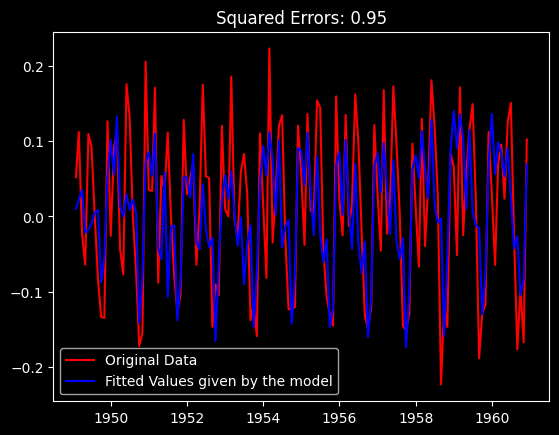

In [ ]:
plt.plot(df_log_diff1, label = "Original Data", color = "red")
plt.plot(results.fittedvalues, label = "Fitted Values given by the model", color = "blue")
plt.title("Squared Errors: %.2f"%sum((results.fittedvalues - df_log_diff1["#Passengers"])**2))  # (Y_pred - y_act)**2

plt.legend() # It for printing the label on the graph
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2915.873, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3049.597, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2954.975, Time=0.13 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2947.028, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3047.612, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2940.108, Time=0.16 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2915.651, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2986.348, Time=0.08 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2915.275, Time=0.42 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2918.411, Time=0.50 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=2925.080, Time=0.48 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2911.330, Time=0.49 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=2911.555, Time=0.20 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=2914.196, Time=0.47 sec
 ARIMA(2,1,1)(1,0,1

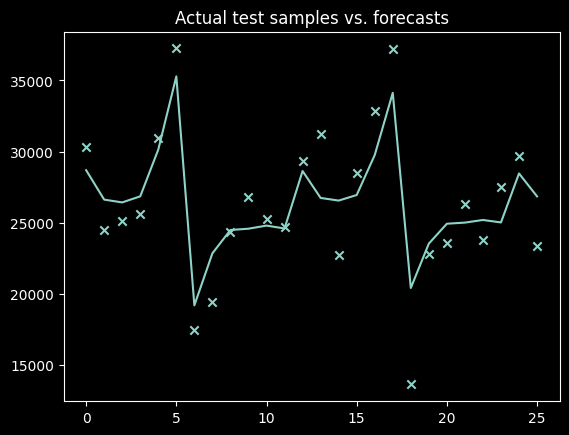

In [ ]:
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

data = pm.datasets.load_wineind()
train, test = model_selection.train_test_split(data, train_size=150)

arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()

In [ ]:
pred = results.predict(1, 143 + 60)

[]

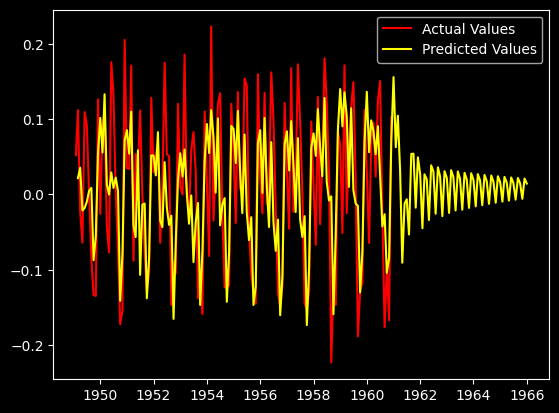

In [ ]:
plt.plot(df_log_diff1, color = "red", label = "Actual Values")
plt.plot(pred, color = "yellow", label = "Predicted Values")
plt.legend()
plt.plot()

<hr>

# **Step 8 - SARIMA**

#### **Implementation**

In [ ]:
model = SARIMAX(df_log_diff1, order = (4, 0, 3), seasonal_order = (4, 0, 3, 12))

In [ ]:
results = model.fit()

#### **Forecast**

In [ ]:
forecast = results.forecast(steps = 60)

[]

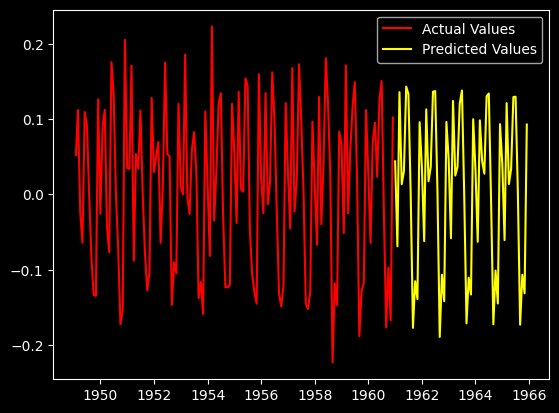

In [ ]:
plt.plot(df_log_diff1, color = "red", label = "Actual Values")
plt.plot(forecast, color = "yellow", label = "Predicted Values")
plt.legend()
plt.plot()

**This data is having seasonality**

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━